In [91]:
import pandas as pd
import seaborn as srn
import statistics as sts

1. PREPARAÇÃO

In [92]:
dataset = pd.read_csv("Churn.csv", sep=";")
#visualizar
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [93]:
#dar nome as colunas
dataset.columns = ["Id","Score","Estado","Gênero","Idade","patrimônio","Saldo","Produtos","TemCArtCredito","ativo","salario","Saiu"]
#visualizar
dataset.head()

,Id,Score,Estado,Gênero,Idade,patrimônio,Saldo,Produtos,TemCArtCredito,ativo,salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [94]:
#explorar dados da categoria
#agrupar dados
#agrupando dados da coluna estado
agrupado = dataset.groupby(["Estado"]).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

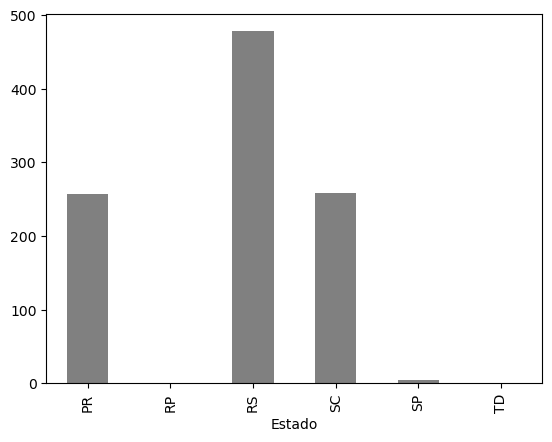

In [95]:
agrupado.plot.bar(color = 'gray')

In [96]:
#Analise Exploratória
#score
dataset["Score"].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

2. ANÁLISE EXPLORATORIA

In [97]:
#agrupar genero
agrupado = dataset.groupby(["Gênero"]).size()
agrupado

Gênero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Gênero'>

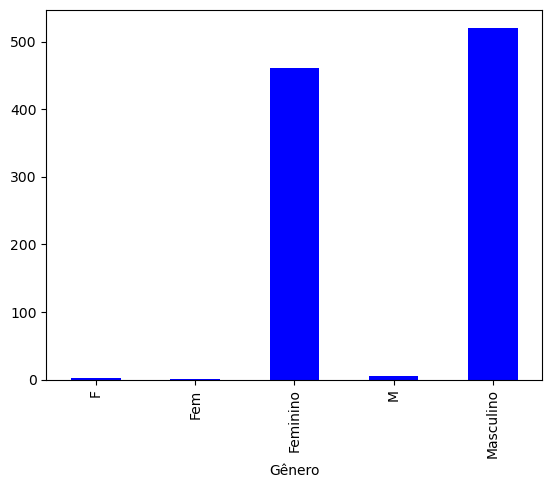

In [98]:
agrupado.plot.bar(color = 'blue')

Text(0.5, 1.0, 'Score')

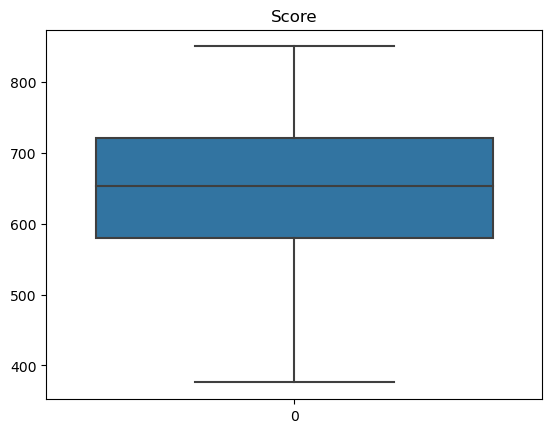

In [99]:
srn.boxplot(dataset["Score"]).set_title('Score')

Text(0.5, 1.0, 'Score')

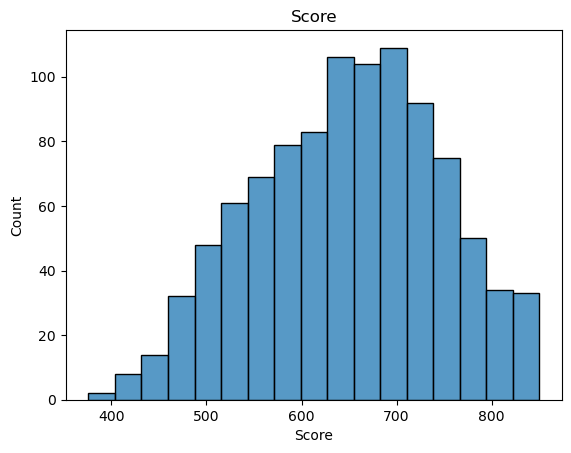

In [100]:
srn.histplot(dataset["Score"]).set_title('Score')

In [101]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

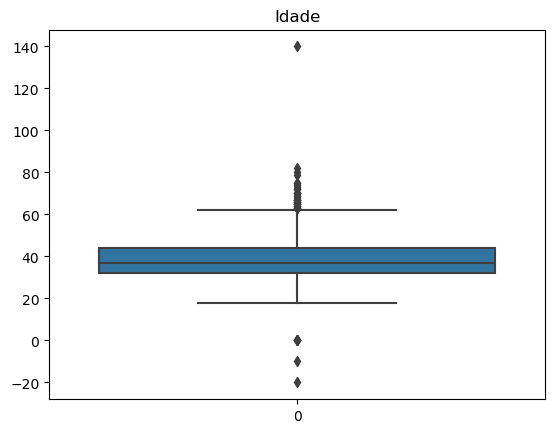

In [102]:
srn.boxplot(dataset['Idade']).set_title('Idade')

Text(0.5, 1.0, 'Idade')

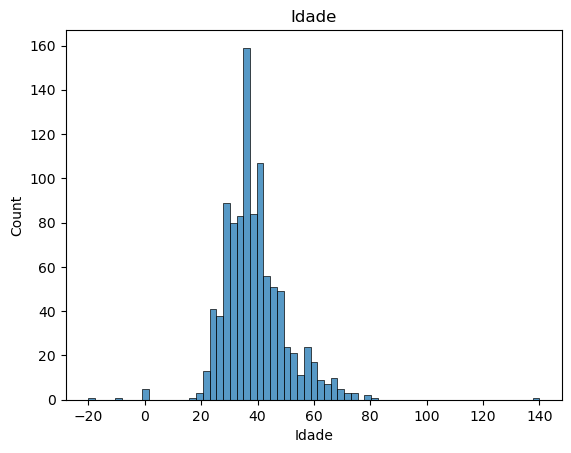

In [103]:
srn.histplot(dataset['Idade']).set_title('Idade')

In [104]:
#saldo
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

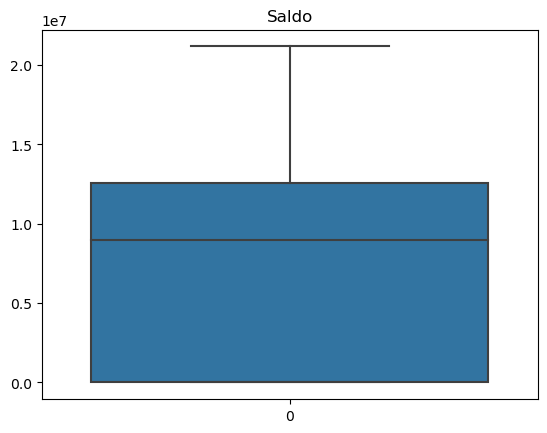

In [105]:
srn.boxplot(dataset['Saldo']).set_title("Saldo")

C:\Users\VitorHugoAmadeu\AppData\Local\Temp\ipykernel_8448\858420742.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Saldo']).set_title("Saldo")


Text(0.5, 1.0, 'Saldo')

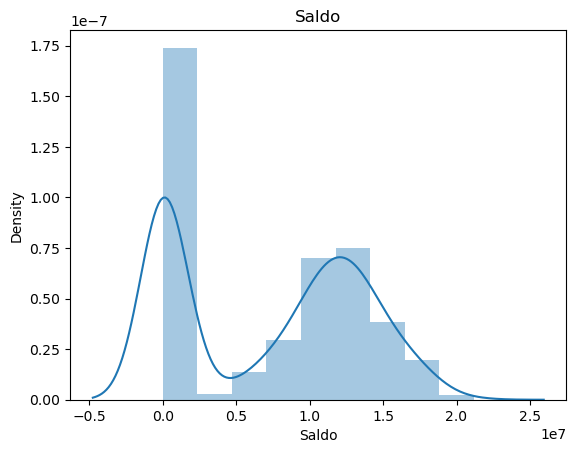

In [106]:
srn.distplot(dataset['Saldo']).set_title("Saldo")

In [107]:
#Salario
dataset['salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: salario, dtype: float64

Text(0.5, 1.0, 'salario')

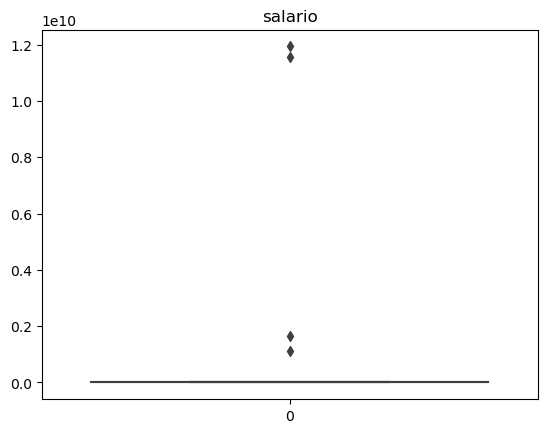

In [108]:
srn.boxplot(dataset['salario']).set_title('salario')

C:\Users\VitorHugoAmadeu\AppData\Local\Temp\ipykernel_8448\1966280398.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['salario']).set_title('salario')


Text(0.5, 1.0, 'salario')

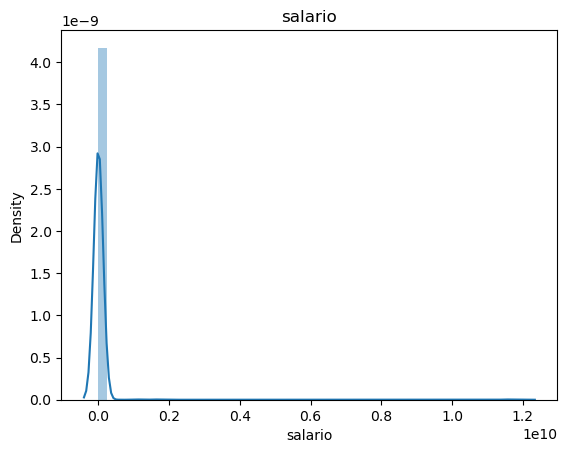

In [109]:
srn.distplot(dataset['salario']).set_title('salario')

In [110]:
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Gênero            8
Idade             0
patrimônio        0
Saldo             0
Produtos          0
TemCArtCredito    0
ativo             0
salario           7
Saiu              0
dtype: int64

3) TRATAMENTO DE DADOS

In [111]:
# Arrumando a coluna salario
# trocar os numeros que estão vazio plea mediana dos salarios

dataset['salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: salario, dtype: float64

In [112]:
mediana = sts.median(dataset['salario'])
mediana

70518.0

In [113]:
dataset['salario'].fillna(mediana, inplace = True)

In [114]:
dataset['salario'].isnull().sum()

0

In [115]:
# Arrumar a coluna gênero
# Agrupando os dados
agrupado = dataset.groupby(['Gênero']).size()
agrupado

Gênero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [116]:
dataset['Gênero'].isnull().sum()

8

In [117]:
#preenchendo as células vazias
dataset['Gênero'].fillna('Masculino', inplace = True)
dataset['Gênero'].isnull().sum()

0

In [118]:
dataset.loc[dataset['Gênero'] == 'M', 'Gênero'] = 'Masculino'
dataset.loc[dataset['Gênero'].isin(['Fem', 'F']),"Gênero"] = "Feminino"

agrupado = dataset.groupby(['Gênero']).size()
agrupado

Gênero
Feminino     464
Masculino    535
dtype: int64

In [119]:
#tratar os dados onde Idade esta fora do padrão
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [120]:
dataset.loc[(dataset['Idade']< 0)| (dataset['Idade']>120)]

,Id,Score,Estado,Gênero,Idade,patrimônio,Saldo,Produtos,TemCArtCredito,ativo,salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [121]:
mediana = sts.median(dataset['Idade'])
mediana

37

In [122]:
dataset.loc[(dataset['Idade']< 0 ) | (dataset['Idade']>120), 'Idade']= mediana

In [123]:
dataset.loc[(dataset['Idade']< 0)| (dataset['Idade']>120)]

,Id,Score,Estado,Gênero,Idade,patrimônio,Saldo,Produtos,TemCArtCredito,ativo,salario,Saiu


In [124]:
dataset[dataset.duplicated(['Id'], keep = False)]

,Id,Score,Estado,Gênero,Idade,patrimônio,Saldo,Produtos,TemCArtCredito,ativo,salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [125]:
#excluimso pelo ID
dataset.drop_duplicates(subset="Id", keep='first',inplace=True)
#buscamos duplicados 
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Gênero,Idade,patrimônio,Saldo,Produtos,TemCArtCredito,ativo,salario,Saiu


In [126]:
#Tratando dados de estado fora do domínio
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [127]:
#atribuomos RS (moda)
dataset.loc[dataset['Estado'].isin( ['RP','SP','TD']), 'Estado'] = "RS"
agrupado = dataset.groupby(['Estado']).size()

In [128]:
#verificamos o resultado
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [130]:
#Tratamento dos dados da coluna Salario
#outliers em salário, vamos considerar 2 desvios padrão
desv = sts.stdev(dataset['salario'])
desv

528988918.4679201

In [132]:
#definir padrão como maior que 2 desvios padrão
#checamos se algum atende critério
dataset.loc[dataset['salario'] >=  2 * desv ] 

,Id,Score,Estado,Gênero,Idade,patrimônio,Saldo,Produtos,TemCArtCredito,ativo,salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [135]:
#vamos atualiar salarios para mediana, calculamos
mediana = sts.median(dataset['salario'])
mediana

8637195.5

In [136]:
#atribumos
dataset.loc[dataset['salario'] >=  2 * desv, 'salario'] = mediana
#checamos se algum atende critério
dataset.loc[dataset['salario'] >=  2 * desv ] 

,Id,Score,Estado,Gênero,Idade,patrimônio,Saldo,Produtos,TemCArtCredito,ativo,salario,Saiu


In [137]:
dataset.head()

,Id,Score,Estado,Gênero,Idade,patrimônio,Saldo,Produtos,TemCArtCredito,ativo,salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [138]:
dataset.shape

(998, 12)